# Cleaning and Sentiment Analysis
Analytics that can be done:
- Compare number of positive and negative sentiments across the competitors
- Compare positive and negative by the user type, local guide or non-local guide
- Analyse the topic (unigram and bigram), find out what they like and what they don't
- Find something to do with the wordcloud


## Open and EDA

In [1]:
import pandas as pd
import numpy as np
import csv

In [5]:
df = pd.read_csv("GR_Gelato Messina (Newtown) Full Data (cleansed).csv")
df

,commentor,comment_on,comments,comments_cleansed,ratings,community member,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,beatrice hecherat,4 days ago,Macadamia crunch is my new passion but I can't...,macadamia crunch is my new passion but i cant ...,5,Local Guide,NaN,NaN,NaN,% of 1 star,2.48
1,Mushtaq Ahmed,4 days ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,% of 2 star,1.98
2,이슙슙,a week ago,This place is really gener …,this place is really gener,5,NaN,NaN,NaN,NaN,% of 3 star,5.08
3,Rohan Pawar,a week ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,% of 4 star,20.45
4,Anushree Patil,2 weeks ago,Nothing can beat the Messina Gelato. Favourite...,nothing can beat the messina gelato favourite ...,5,NaN,NaN,NaN,NaN,% of 5 star,70.01
...,...,...,...,...,...,...,...,...,...,...,...
802,Alan Tan,6 years ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,NaN,NaN
803,Alison Riley,6 years ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,NaN,NaN
804,Mya,6 years ago,Great to see messina in newtown. Fantastic loc...,great to see messina in newtown fantastic loca...,4,Local Guide,NaN,NaN,NaN,NaN,NaN
805,Henrietta Greene,6 years ago,"Amazing coffee gelato, and a subtle yet delici...",amazing coffee gelato and a subtle yet delicio...,5,Local Guide,NaN,NaN,NaN,NaN,NaN


In [6]:
df['comments_cleansed'] = df['comments_cleansed'].str.replace('\n', '')
df

,commentor,comment_on,comments,comments_cleansed,ratings,community member,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,beatrice hecherat,4 days ago,Macadamia crunch is my new passion but I can't...,macadamia crunch is my new passion but i cant ...,5,Local Guide,NaN,NaN,NaN,% of 1 star,2.48
1,Mushtaq Ahmed,4 days ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,% of 2 star,1.98
2,이슙슙,a week ago,This place is really gener …,this place is really gener,5,NaN,NaN,NaN,NaN,% of 3 star,5.08
3,Rohan Pawar,a week ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,% of 4 star,20.45
4,Anushree Patil,2 weeks ago,Nothing can beat the Messina Gelato. Favourite...,nothing can beat the messina gelato favourite ...,5,NaN,NaN,NaN,NaN,% of 5 star,70.01
...,...,...,...,...,...,...,...,...,...,...,...
802,Alan Tan,6 years ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,NaN,NaN
803,Alison Riley,6 years ago,NaN,NaN,5,Local Guide,NaN,NaN,NaN,NaN,NaN
804,Mya,6 years ago,Great to see messina in newtown. Fantastic loc...,great to see messina in newtown fantastic loca...,4,Local Guide,NaN,NaN,NaN,NaN,NaN
805,Henrietta Greene,6 years ago,"Amazing coffee gelato, and a subtle yet delici...",amazing coffee gelato and a subtle yet delicio...,5,Local Guide,NaN,NaN,NaN,NaN,NaN


In [7]:
df2 = df[["comments_cleansed", "community member"]]
df2

,comments_cleansed,community member
0,macadamia crunch is my new passion but i cant ...,Local Guide
1,NaN,Local Guide
2,this place is really gener,NaN
3,NaN,Local Guide
4,nothing can beat the messina gelato favourite ...,NaN
...,...,...
802,NaN,Local Guide
803,NaN,Local Guide
804,great to see messina in newtown fantastic loca...,Local Guide
805,amazing coffee gelato and a subtle yet delicio...,Local Guide


## Pre-processing

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Drop if empty
df2.dropna(subset=['comments_cleansed'], inplace=True)

<ipython-input-9-4f9c45ac7445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['comments_cleansed'], inplace=True)


In [10]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)

    # Remove stopwords, perform stemming, and handle contractions
    filtered_words = [porter.stem(word) for word in words if word.lower() not in stop_words]

    # Join the words back into a string
    processed_text = ' '.join(filtered_words)

    # Handle contractions (expanding them)
    processed_text = expand_contractions(processed_text)

    return processed_text

# Function to expand contractions
def expand_contractions(text):
    # Dictionary of common contractions and their expansions
    contractions_dict = {
        "can't": "cannot",
        "n't": "not",
        "'ve": "have",
        "'ll": "will",
        "'re": "are",
        "'d": "would",
        "'s": "is",
        "'m": "am"
    }
    # Regular expression pattern to match contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [11]:
# Remove Stop Words
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df2['comments_cleansed'] = df2['comments_cleansed'].apply(remove_stopwords)

<ipython-input-11-554f2e185a5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['comments_cleansed'] = df2['comments_cleansed'].apply(remove_stopwords)


In [12]:
df2['comments_cleansed'] = df2['comments_cleansed'].apply(preprocess_text)

<ipython-input-12-8be15da7c8be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['comments_cleansed'] = df2['comments_cleansed'].apply(preprocess_text)


In [13]:
df2

,comments_cleansed,community member
0,macadamia crunch new passion cant live without...,Local Guide
2,place realli gener,NaN
4,noth beat messina gelato favourit post dinner ...,NaN
5,best gelato town,NaN
8,amaz select gelato youll difficulti choos flav...,Local Guide
...,...,...
800,fantast servic delici icecream easi pay app,Local Guide
801,yummi ice cream,Local Guide
804,great see messina newtown fantast locat great ...,Local Guide
805,amaz coffe gelato subtl yet delici coconut pan...,Local Guide


## Sentiment Analysis

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
def get_sentiment_scores(text):
    # Get the sentiment scores using VADER
    scores = sid.polarity_scores(text)
    return scores

In [16]:
df2['sentiment_scores'] = df2['comments_cleansed'].apply(get_sentiment_scores)
df2['compound_sentiment'] = df2['sentiment_scores'].apply(lambda x: x['compound'])

<ipython-input-16-ad28bba6924b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment_scores'] = df2['comments_cleansed'].apply(get_sentiment_scores)
<ipython-input-16-ad28bba6924b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compound_sentiment'] = df2['sentiment_scores'].apply(lambda x: x['compound'])


In [17]:
# Classify based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.4:
        return 'negative'
    else:
        return 'neutral'

In [18]:
# Apply sentiment classification
df2['sentiment'] = df2['compound_sentiment'].apply(classify_sentiment)

# Print the updated DataFrame with sentiment analysis results
print(df2[['comments_cleansed', 'compound_sentiment', 'sentiment']])

                                     comments_cleansed  compound_sentiment  \
0    macadamia crunch new passion cant live without...              0.4588   
2                                   place realli gener              0.0000   
4    noth beat messina gelato favourit post dinner ...              0.7845   
5                                     best gelato town              0.6369   
8    amaz select gelato youll difficulti choos flav...              0.7506   
..                                                 ...                 ...   
800        fantast servic delici icecream easi pay app             -0.1027   
801                                    yummi ice cream              0.0000   
804  great see messina newtown fantast locat great ...              0.8979   
805  amaz coffe gelato subtl yet delici coconut pan...              0.9062   
806                     one better ice cream place ive              0.4404   

    sentiment  
0    positive  
2     neutral  
4    positive  

<ipython-input-18-f89bd7e3ff47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = df2['compound_sentiment'].apply(classify_sentiment)


In [19]:
negative_sentiment_df = df2[df2['sentiment'] == 'negative']
negative_sentiment_df[['comments_cleansed', 'compound_sentiment']]
# for comment in negative_sentiment_df:
#     print(comment)
    #print("Comments: " + str(comment['comments_cleansed']) + ", Score: " + str(comment['compound_sentiment']))

,comments_cleansed,compound_sentiment
32,ice cream delici alway one staff rude poor cos...,-0.7269
200,ah messina go ruin nowarn credit card surcharg...,-0.5859
223,disappoint experi gelato qualiti absolut rubbi...,-0.5719
267,spectacular bomb alaska,-0.4939
269,ice cream die,-0.5994
274,someth quit right one flavour alway store real...,-0.5423
306,overpr australian garbag small serv poor custo...,-0.5106
308,staff racist asian wait store 20 minut tri wav...,-0.6124
393,crew friendli plenti flavour problem choos,-0.4019
452,white choc hazelnut die great cone shame hazel...,-0.6808


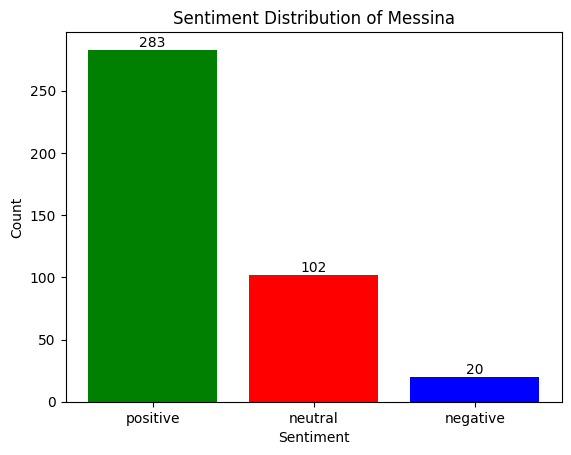

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df2['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Messina')

for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

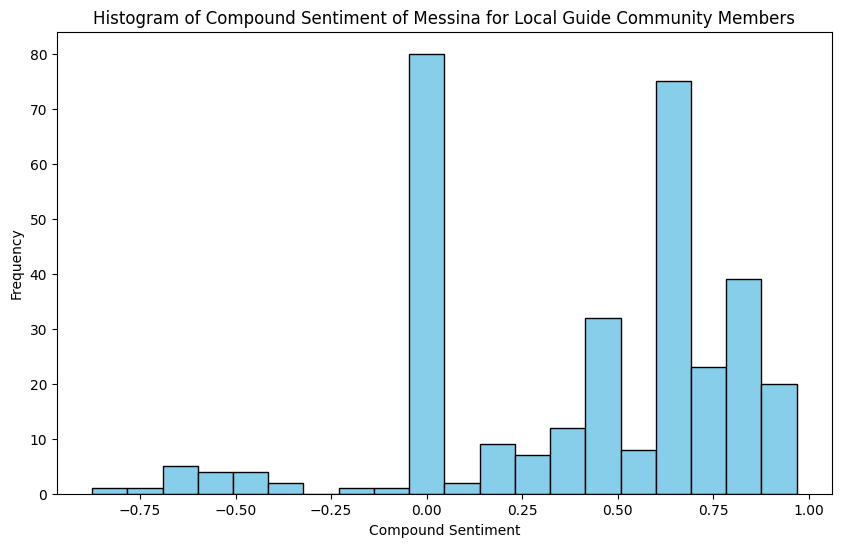

In [ ]:
# Plot historgram by Local Guide

local_guide_sentiments = df2[df2['community member'] == 'Local Guide']['compound_sentiment']

# Plotting a histogram for the sentiment scores of 'Local Guide'
plt.figure(figsize=(10, 6))
plt.hist(local_guide_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Sentiment of Messina for Local Guide Community Members')
plt.show()


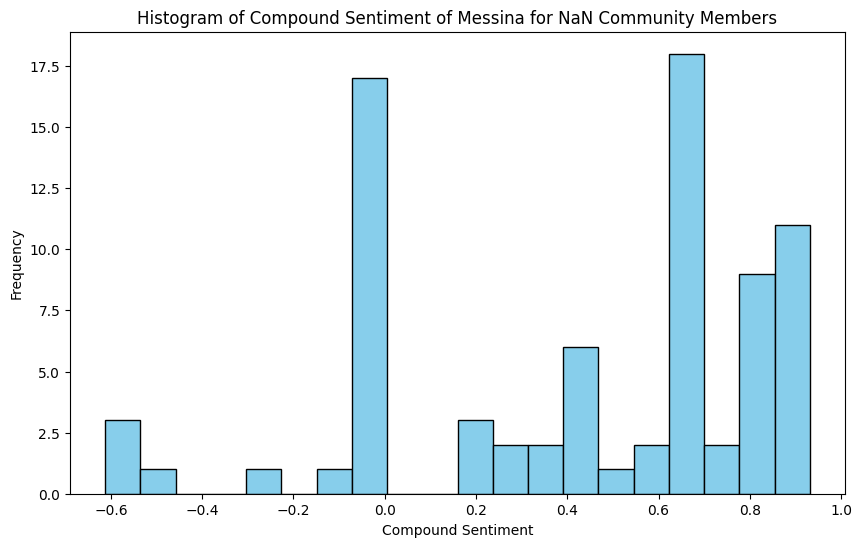

In [ ]:
# Plot histogram for NaN (Normal Members)

nan_sentiments = df2[df2['community member'].isna()]['compound_sentiment']

# Plotting a histogram for the sentiment scores of NaN community members
plt.figure(figsize=(10, 6))
plt.hist(nan_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Sentiment of Messina for NaN Community Members')
plt.show()

## Topic Modelling
We will try 5 topic then 3 topic

Topics:
Topic 0: 0.028*"cream" + 0.028*"ice" + 0.025*"love" + 0.023*"gelato" + 0.017*"place" + 0.014*"go" + 0.013*"flavour" + 0.012*"alway" + 0.012*"tast" + 0.010*"one"
Topic 1: 0.019*"messina" + 0.018*"realli" + 0.018*"cream" + 0.018*"ice" + 0.017*"good" + 0.014*"like" + 0.014*"place" + 0.013*"gelato" + 0.012*"sorbet" + 0.010*"go"
Topic 2: 0.036*"ice" + 0.034*"cream" + 0.032*"best" + 0.027*"gelato" + 0.023*"delici" + 0.019*"icecream" + 0.016*"good" + 0.013*"pistachio" + 0.013*"nice" + 0.012*"servic"
Topic 3: 0.040*"gelato" + 0.036*"messina" + 0.017*"flavour" + 0.013*"like" + 0.013*"alway" + 0.012*"good" + 0.011*"go" + 0.011*"favourit" + 0.009*"love" + 0.008*"tri"
Topic 4: 0.043*"flavour" + 0.042*"great" + 0.035*"gelato" + 0.027*"staff" + 0.024*"cream" + 0.024*"ice" + 0.024*"friendli" + 0.021*"servic" + 0.018*"best" + 0.016*"alway"


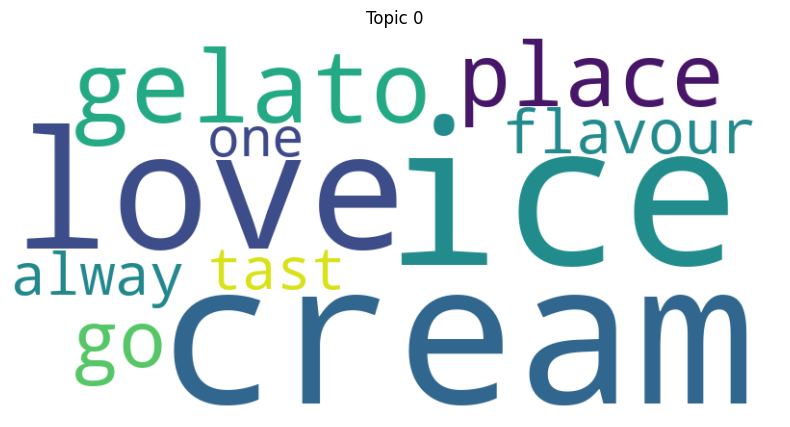

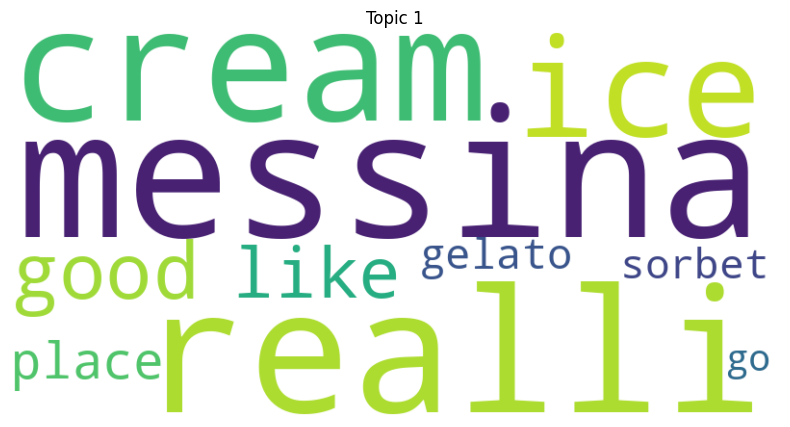

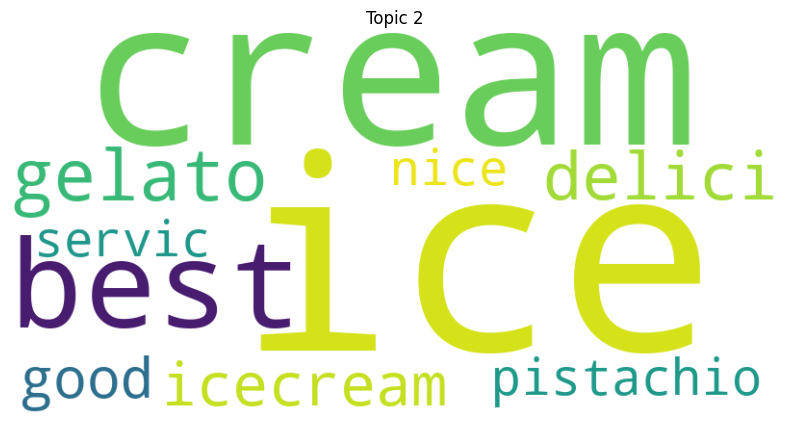

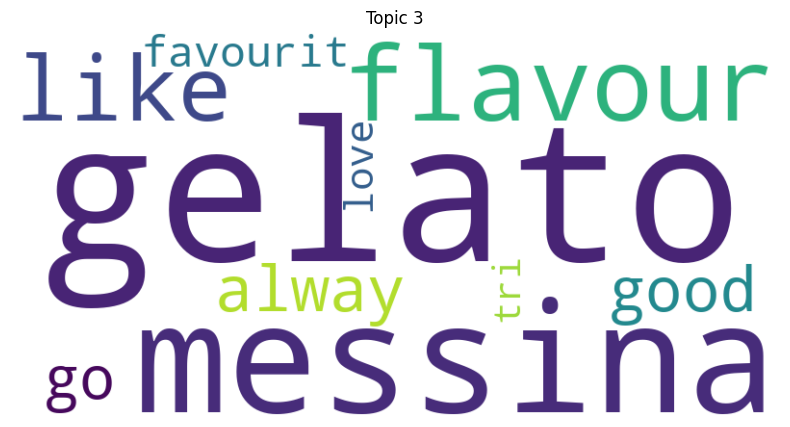

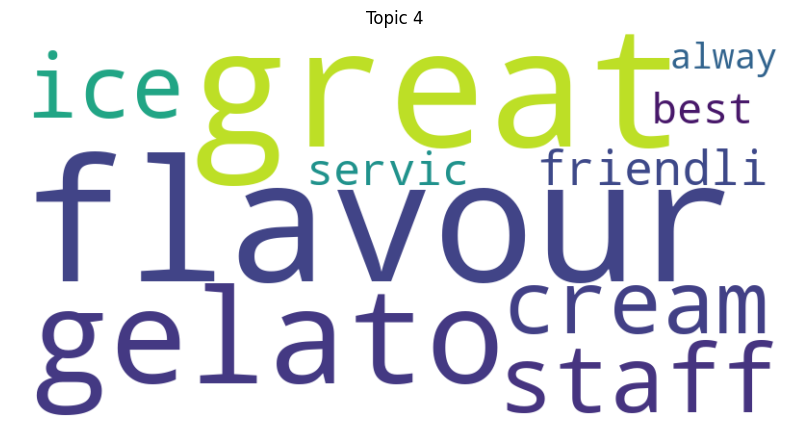

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Preprocess the text (assuming df2 is your DataFrame)
texts = df2['comments_cleansed'].tolist()

# Tokenize and clean the text
tokenized_texts = [text.split() for text in texts]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id}: {words}")

# Visualize the topics
topics = lda_model.show_topics(formatted=False)
wordcloud = WordCloud(width=800, height=400, background_color='white')

for topic_id, words in topics:
    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()


Topics:
Topic 0: 0.045*"ice" + 0.044*"cream" + 0.029*"flavour" + 0.020*"good" + 0.019*"best" + 0.019*"alway" + 0.017*"place" + 0.016*"staff" + 0.016*"gelato" + 0.015*"great"
Topic 1: 0.044*"gelato" + 0.024*"great" + 0.024*"messina" + 0.016*"delici" + 0.015*"servic" + 0.012*"good" + 0.011*"love" + 0.011*"flavour" + 0.010*"best" + 0.008*"alway"
Topic 2: 0.033*"gelato" + 0.022*"go" + 0.021*"love" + 0.015*"messina" + 0.012*"flavor" + 0.011*"staff" + 0.010*"serv" + 0.009*"nice" + 0.008*"definit" + 0.008*"worth"


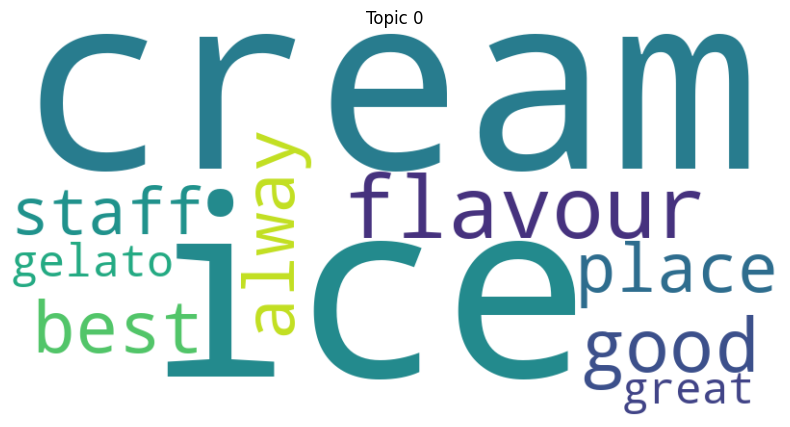

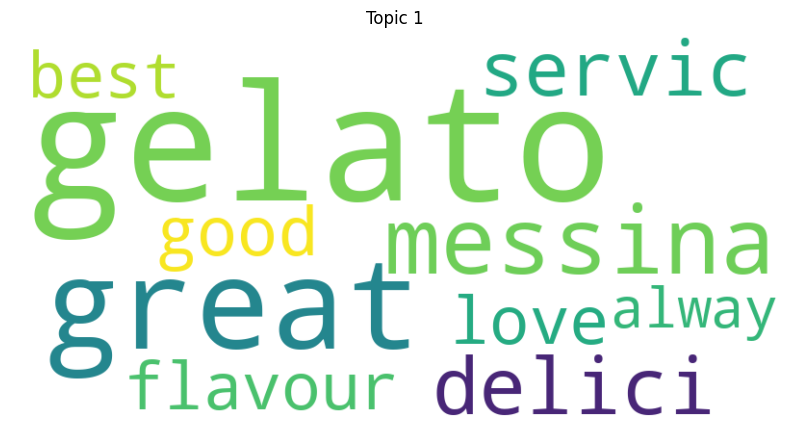

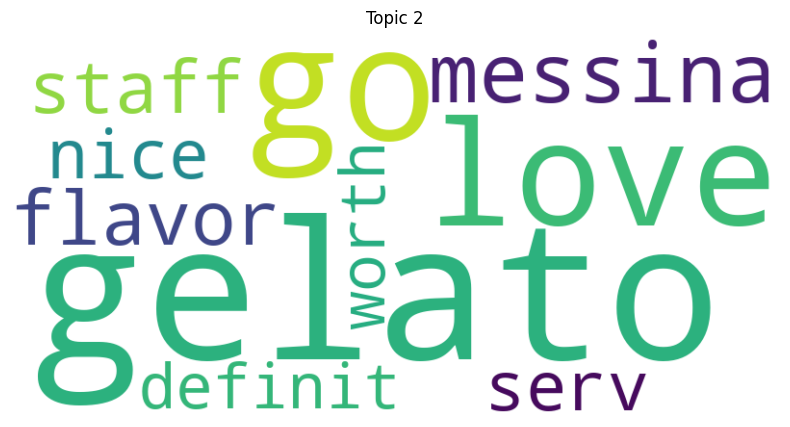

In [21]:
# 3 topic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Preprocess the text (assuming df2 is your DataFrame)
texts = df2['comments_cleansed'].tolist()

# Tokenize and clean the text
tokenized_texts = [text.split() for text in texts]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Display the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id}: {words}")

# Visualize the topics
topics = lda_model.show_topics(formatted=False)
wordcloud = WordCloud(width=800, height=400, background_color='white')

for topic_id, words in topics:
    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()


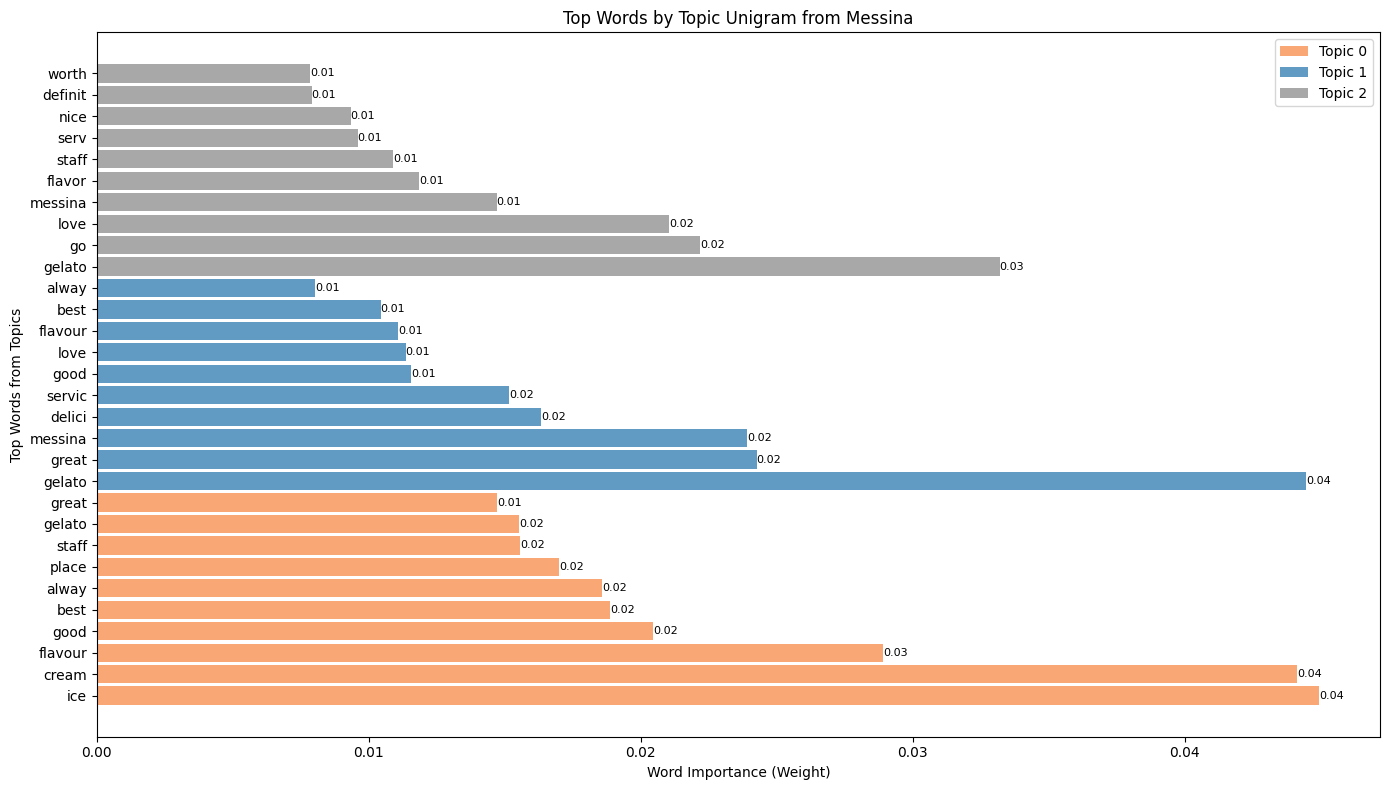

In [22]:
# Set up the plot dimensions and configurations
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.85  # Width of the bars

# Colors for different topics in shades of orange, blue, and grey
colors = ['#f9a875', '#619ac3', '#a8a8a8']  # Orange, Blue, Grey

# Number of top words to display for each topic
top_n = 10

# Extract the top words and their weights
top_words = {topic_id: lda_model.show_topic(topic_id, topn=top_n) for topic_id in range(lda_model.num_topics)}

# Store the words and their positions for labeling on the y-axis
tick_labels = []
positions = []

# Starting position for the first topic's bars
current_position = 0

# Iterate over each topic to plot the bars
for topic_id, words_data in top_words.items():
    words, weights = zip(*words_data)  # Unpack the words and their corresponding weights

    # Plot the bars for the current topic's words
    bars = ax.barh(current_position + np.arange(top_n), weights, bar_width, label=f'Topic {topic_id}', color=colors[topic_id % len(colors)])

    # Annotate the bars with the score
    for bar, score in zip(bars, weights):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Add the words to the tick_labels list for the y-axis
    tick_labels.extend(words)

    # Update the positions for y-ticks
    positions.extend(current_position + np.arange(top_n))

    # Update the starting position for the next topic
    current_position += top_n

# Set the y-ticks to be in the middle of the bars for each topic
ax.set_yticks(positions)
ax.set_yticklabels(tick_labels)

# Set the labels and title of the plot
ax.set_xlabel('Word Importance (Weight)')
ax.set_ylabel('Top Words from Topics')
ax.set_title('Top Words by Topic Unigram from Messina')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-24-121c1a4a1fc8>:48: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(jsd_matrix, 'ward')


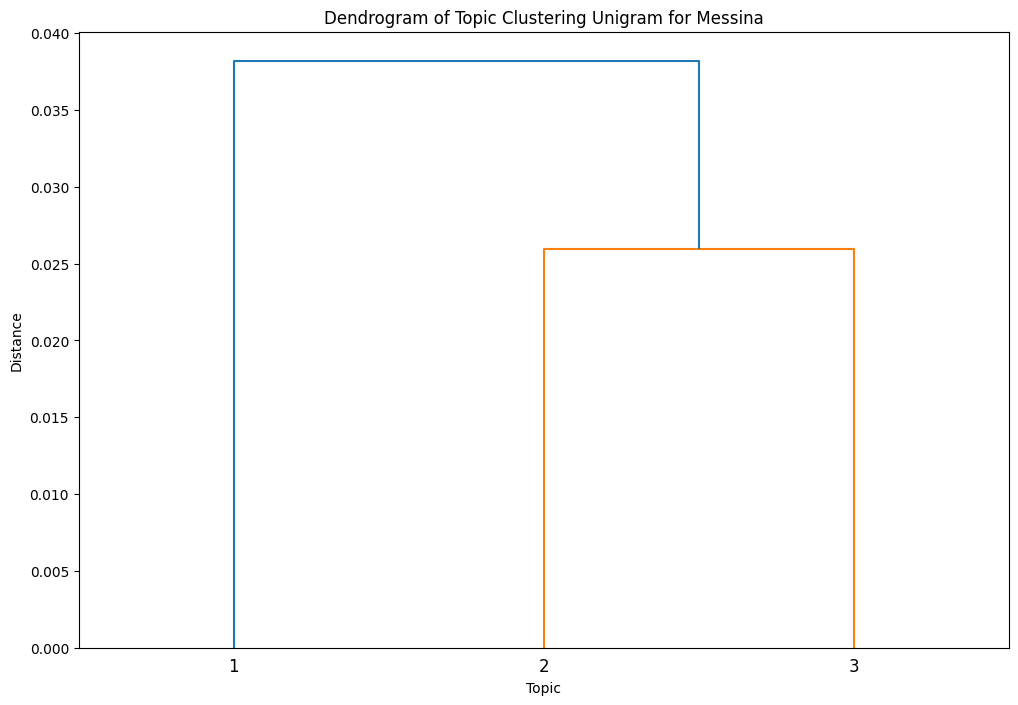

In [24]:
import numpy as np
from scipy.stats import entropy
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

def jsd(p, q):
    # Calculate Jensen-Shannon Divergence
    p = np.asarray(p)
    q = np.asarray(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Number of topics
num_topics = lda_model.num_topics

# Get the topic distribution for all topics
topic_distributions = [lda_model.show_topic(topicid, topn=len(dictionary)) for topicid in range(num_topics)]
topic_distributions_probs = [[word_probability for _, word_probability in topic_distribution] for topic_distribution in topic_distributions]

# Initialize an empty matrix
jsd_matrix = np.zeros((num_topics, num_topics))

# Populate the JSD matrix with the Jensen-Shannon Divergence values
for i in range(num_topics):
    for j in range(num_topics):
        # As JSD is symmetric, no need to calculate it twice
        if i < j:
            divergence = jsd(topic_distributions_probs[i], topic_distributions_probs[j])
            jsd_matrix[i, j] = divergence
            jsd_matrix[j, i] = divergence

# Now you have a JSD matrix defined, continue with MDS
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(jsd_matrix)  # Apply MDS to the JSD matrix

# Calculate scaled sizes
topic_sizes = [100 * lda_model.state.get_lambda()[i].sum() for i in range(num_topics)]

### Jenson-Shannon Divergence Matrix
from scipy.cluster.hierarchy import linkage, dendrogram

# Use the Jensen-Shannon divergence matrix to perform hierarchical clustering
Z = linkage(jsd_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=range(1, num_topics+1))
plt.title('Dendrogram of Topic Clustering Unigram for Messina')
plt.xlabel('Topic')
plt.ylabel('Distance')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['comments_cleansed'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit and transform the cleansed comments
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['comments_cleansed'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top n phrases for each review
top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative':[]
}

# Iterate through sentiment_groups and extract top phrases
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[0, x] for x in feature_index])
    top_phrases = [feature_names[i] for i, _ in sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]]

    # Append the top phrases to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(top_phrases)

# Display the top phrases for each sentiment group
for sentiment, top_phrases_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases in enumerate(top_phrases_list):
        print(f"Top Phrases for review {i+1}: {', '.join(phrases)}")
    print('\n')


Sentiment: Positive
Top Phrases for review 1: gelato, cream, ice, flavour, great, good, best, love, messina, alway


Sentiment: Neutral
Top Phrases for review 1: gelato, delici, ice, amaz, cream, messina, servic, icecream, flavour, friendli


Sentiment: Negative
Top Phrases for review 1: gelato, flavour, ice, die, messina, staff, cream, dollar, tast, store




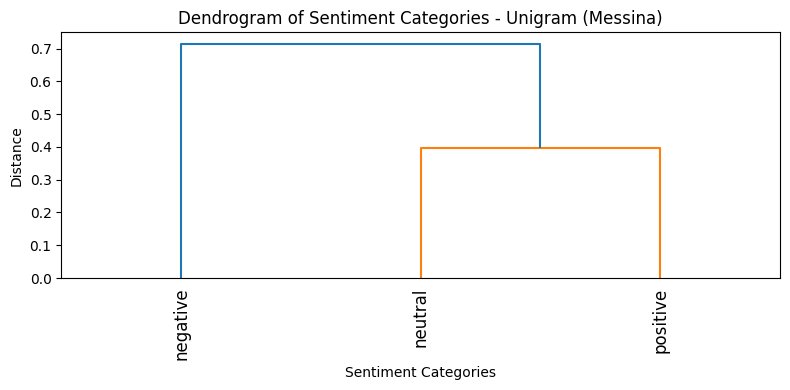

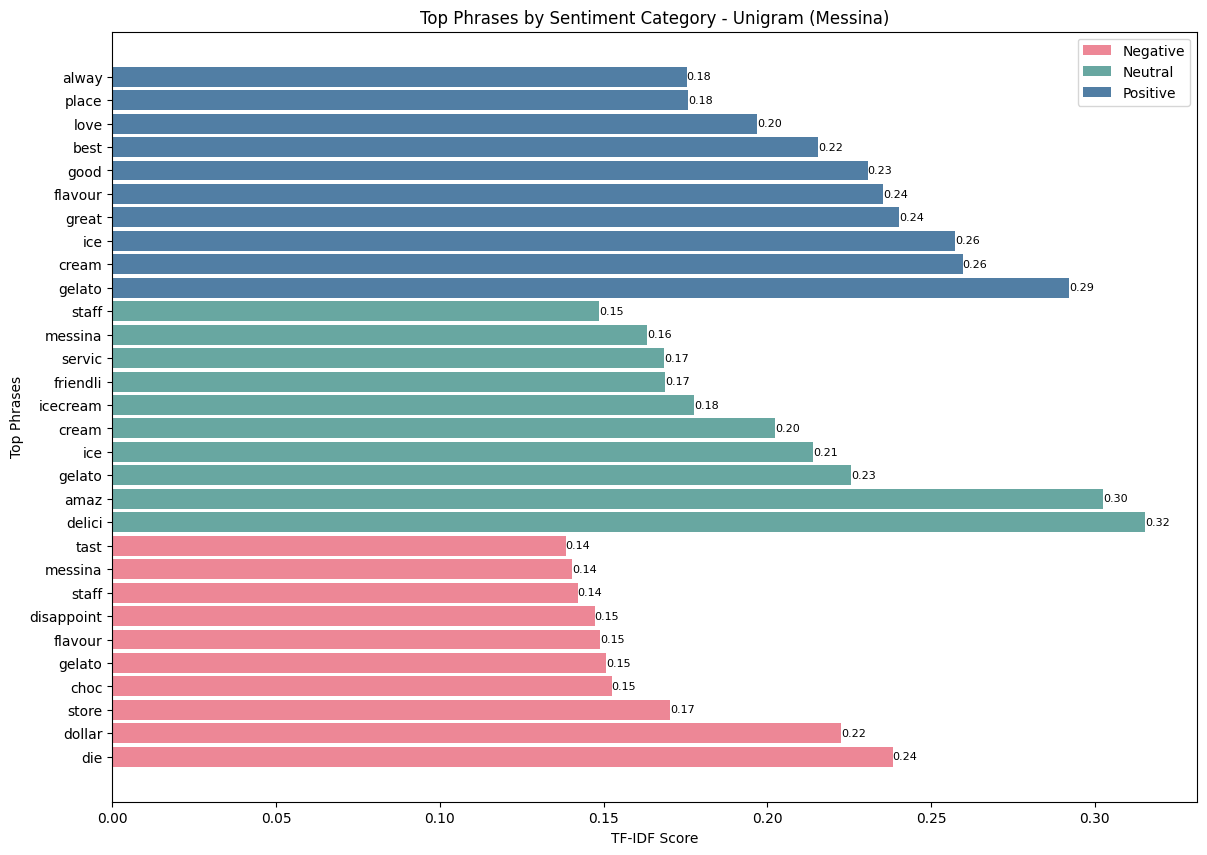

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['comments_cleansed'])

# Create an empty DataFrame to hold the feature space for each sentiment
tfidf_feature_df = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names_out())

# Iterate through sentiment_groups and create a TF-IDF row for each
for sentiment, comments in sentiment_groups.items():
    # Transform the merged comments for each sentiment group
    tfidf_vector = tfidf_vectorizer.transform([comments])
    tfidf_feature_df.loc[sentiment] = tfidf_vector.toarray().flatten()

# Now tfidf_feature_df contains the TF-IDF scores for each sentiment's top phrases

# Calculate the pairwise distance matrix using cosine distance (1 - cosine similarity)
distance_matrix = pdist(tfidf_feature_df, 'cosine')

# Perform Hierarchical Clustering
Z = linkage(distance_matrix, 'ward')  # You can use other methods like 'average', 'complete', etc.

# Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=tfidf_feature_df.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram of Sentiment Categories - Unigram (Messina)')
plt.xlabel('Sentiment Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'tfidf_feature_df' is a DataFrame with sentiments as the index and words as columns
top_n = 10

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Width of the bars
bar_width = 0.85

# Initialize the base position for the first bar set
base_pos = np.arange(top_n)

# Colors for different sentiments, switch the color for negative and neutral
colors = ['#ed8796', '#68a7a1', '#517ea4']  # Darker pastel blue for positive, green for neutral, pink for negative

# To store the tick labels
tick_labels = []

# To store the position of the bars for labeling
label_pos = []

# Iterate over each sentiment to plot the bars
for i, sentiment in enumerate(tfidf_feature_df.index):
    sorted_indices = np.argsort(tfidf_feature_df.loc[sentiment])[-top_n:][::-1]
    top_features = tfidf_feature_df.columns[sorted_indices]
    top_scores = tfidf_feature_df.loc[sentiment][sorted_indices]

    # Plotting each sentiment's top phrases
    bars = ax.barh(base_pos, top_scores, bar_width, label=sentiment.capitalize(), color=colors[i], edgecolor='none')

    # Annotate the bars with the score
    for bar, score in zip(bars, top_scores):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Store the positions and labels
    tick_labels.extend(top_features)
    label_pos.extend(base_pos)

    # Update the base_pos for the next sentiment
    base_pos = base_pos + top_n

# Set the y-tick labels
ax.set_yticks(label_pos)
ax.set_yticklabels(tick_labels)

# Set chart title and labels
ax.set_title('Top Phrases by Sentiment Category - Unigram (Messina)')
ax.set_xlabel('TF-IDF Score')
ax.set_ylabel('Top Phrases')

# Add legend
ax.legend()

# Show plot
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['comments_cleansed'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2, 2))

# Get the top n phrases for each review
top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative': []
}

# Iterate through sentiment_groups and extract top phrases
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[0, x] for x in feature_index])
    top_phrases = [feature_names[i] for i, _ in sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]]

    # Append the top phrases to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(top_phrases)

# Display the top phrases for each sentiment group
for sentiment, top_phrases_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases in enumerate(top_phrases_list):
        print(f"Top Phrases for review {i+1}: {', '.join(phrases)}")
    print('\n')


Sentiment: Positive
Top Phrases for review 1: ice cream, best gelato, best ice, friendli staff, delici gelato, new flavour, gelato great, tast like, custom servic, great servic


Sentiment: Neutral
Top Phrases for review 1: ice cream, delici gelato, amaz ice, delici alway, friendli staff, awesom gelato, amaz delici, alway amaz, delici ice, staff friendli


Sentiment: Negative
Top Phrases for review 1: ice cream, gave 50, choc chip, amaz gelato, dulc lech, cream die, 50 receiv, claim gave, situat claim, akward situat




In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['comments_cleansed'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2,2))

# Fit and transform the cleansed comments
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['comments_cleansed'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top n phrases for each review
top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative':[]
}

# Iterate through sentiment_groups and extract top phrases along with their scores
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases with their scores
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = [(feature_names[i], tfidf_matrix[0, x]) for i, x in zip(feature_index, feature_index)]
    sorted_phrases_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Append the top phrases with scores to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(sorted_phrases_scores)

# Display the top phrases with their scores for each sentiment group
for sentiment, top_phrases_scores_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases_scores in enumerate(top_phrases_scores_list):
        phrases_with_scores = ', '.join([f"{phrase} ({score:.4f})" for phrase, score in phrases_scores])
        print(f"Top Phrases for review {i+1}: {phrases_with_scores}")
    print('\n')

Sentiment: Positive
Top Phrases for review 1: ice cream (0.8175), best gelato (0.2167), best ice (0.1280), friendli staff (0.0985), delici gelato (0.0788), new flavour (0.0689), gelato great (0.0689), tast like (0.0689), custom servic (0.0689), great servic (0.0591)


Sentiment: Neutral
Top Phrases for review 1: ice cream (0.5503), delici gelato (0.1467), amaz ice (0.1101), delici alway (0.1101), friendli staff (0.1101), awesom gelato (0.0734), amaz delici (0.0734), alway amaz (0.0734), delici ice (0.0734), staff friendli (0.0734)


Sentiment: Negative
Top Phrases for review 1: ice cream (0.2999), gave 50 (0.1200), choc chip (0.1200), amaz gelato (0.1200), dulc lech (0.1200), cream die (0.1200), 50 receiv (0.0600), claim gave (0.0600), situat claim (0.0600), akward situat (0.0600)




<ipython-input-28-44481ead85ce>:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, 'ward')


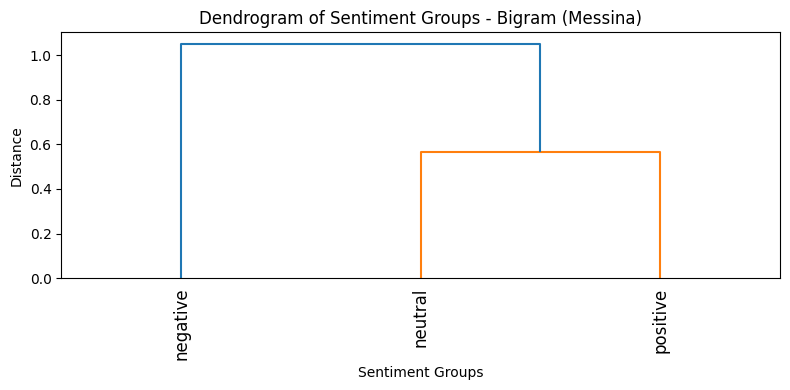

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and it contains the 'sentiment' and 'cleansed_comments' columns

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['comments_cleansed'])

# Transform the merged comments for each sentiment group
tfidf_matrices = [tfidf_vectorizer.transform([comments]) for comments in sentiment_groups.values()]

# Compute a distance matrix between the TF-IDF vectors of each sentiment group
from sklearn.metrics.pairwise import cosine_distances

# Stack all group vectors into a single matrix for distance computation
tfidf_matrix_stack = np.vstack([tfidf_matrix.toarray() for tfidf_matrix in tfidf_matrices])

# Compute cosine distances (1 - cosine_similarity) between TF-IDF vectors
distance_matrix = cosine_distances(tfidf_matrix_stack)

# Perform hierarchical clustering
Z = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=list(sentiment_groups.keys()), leaf_rotation=90)
plt.title('Dendrogram of Sentiment Groups - Bigram (Messina)')
plt.xlabel('Sentiment Groups')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

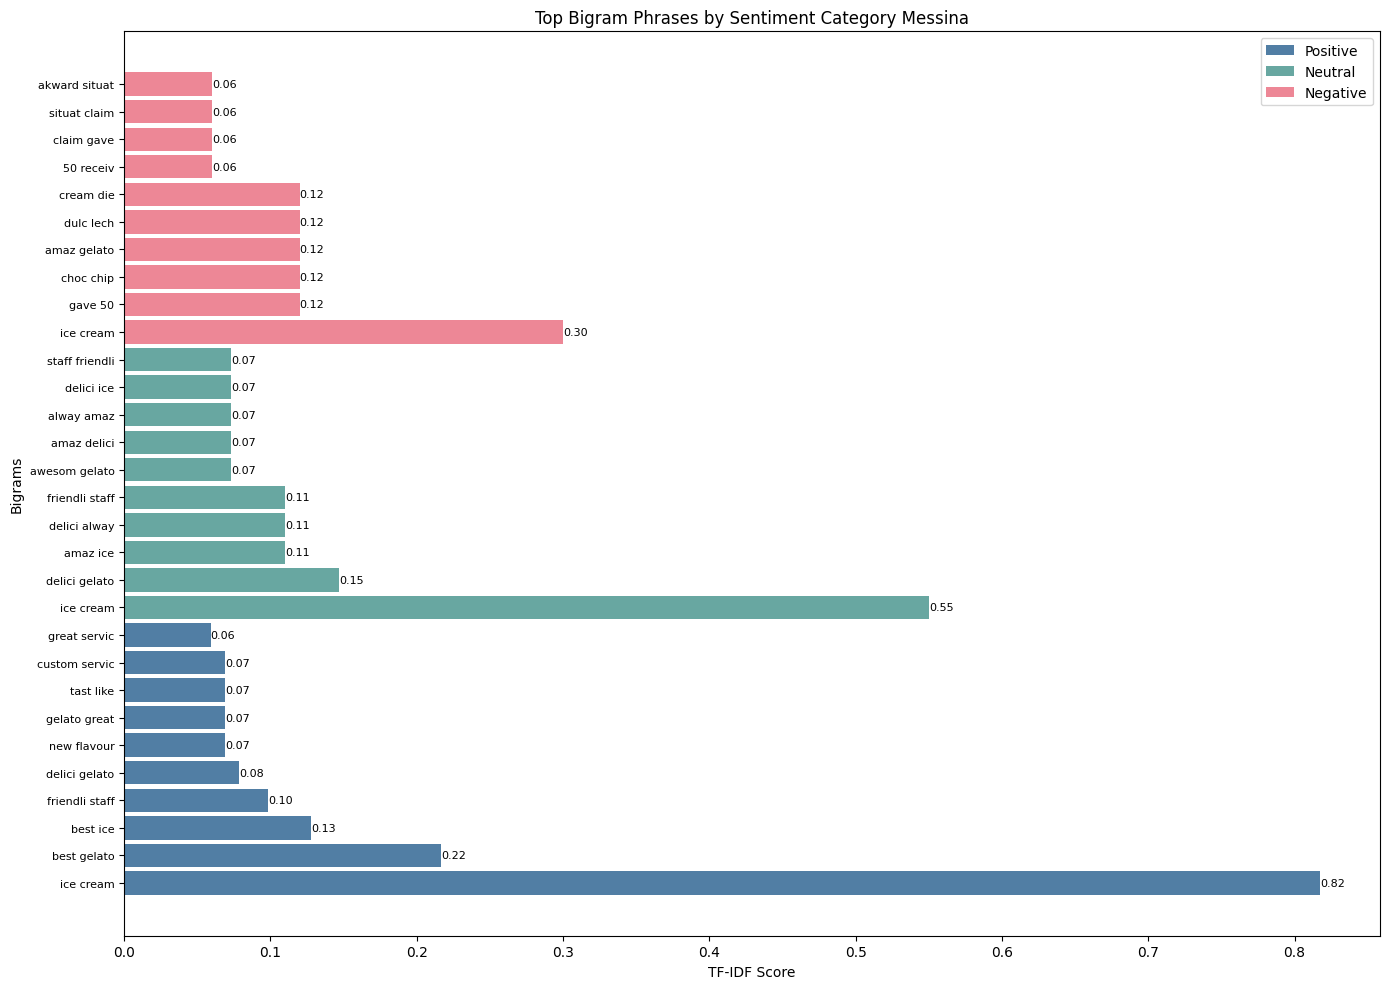

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Group by 'sentiment' and join the cleansed comments
sentiment_groups = df2.groupby('sentiment')['comments_cleansed'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2, 2))

# DataFrame to hold the top phrases and their scores
df_top_phrases = pd.DataFrame()

# Get the top n bigrams for each sentiment
top_n = 10

# Iterate through sentiment_groups and extract top bigrams
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top bigrams and their scores
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = [(feature_names[i], tfidf_matrix[0, x]) for i, x in zip(feature_index, feature_index)]

    # Sort by score and get top n
    top_phrases_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Append to DataFrame
    df_top_phrases[sentiment.capitalize() + ' Word'] = [phrase for phrase, score in top_phrases_scores]
    df_top_phrases[sentiment.capitalize() + ' Score'] = [score for phrase, score in top_phrases_scores]

# Transpose the DataFrame so each sentiment category is a column
df_top_phrases_transposed = df_top_phrases.T


# Set the number of top phrases (bigrams) for each sentiment
top_n = 10

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Colors for different sentiments
colors = ['#517ea4', '#68a7a1', '#ed8796']  # Darker pastel blue, green, pink

# Iterate over each sentiment to plot the bars
bigram_labels = []  # This will store all bigram labels for y-ticks
current_position = 0  # Initialize the position for the first sentiment's bars

for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    # Select the bigrams and their scores for the current sentiment
    bigrams = df_top_phrases[sentiment + ' Word']
    scores = df_top_phrases[sentiment + ' Score']
    y_pos = np.arange(current_position, current_position + len(bigrams))

    # Plot the bars for the current sentiment's bigrams
    bars = ax.barh(y_pos, scores, height=0.85, label=sentiment, color=colors[i])

    # Annotate the bars with the score
    for bar, score in zip(bars, scores):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Update the bigram labels list and the current position
    bigram_labels.extend(bigrams)
    current_position += len(bigrams)

# Set the y-tick labels
ax.set_yticks(np.arange(top_n * 3))  # Total number of bars is top_n times the number of sentiments
ax.set_yticklabels(bigram_labels, fontsize=8)

# Set the labels and title of the plot
ax.set_xlabel('TF-IDF Score')
ax.set_ylabel('Bigrams')
ax.set_title('Top Bigram Phrases by Sentiment Category Messina')

# Add a legend
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

## Bigram

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import string

# Define a function for text preprocessing with bigrams or trigrams
def preprocess_text_with_ngrams(text, n=2):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and numbers
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Generate n-grams (bigrams or trigrams)
    n_grams = ngrams(tokens, n)
    n_grams = [' '.join(gram) for gram in n_grams]

    return ' '.join(n_grams)

# Apply preprocessing with bigrams or trigrams to the 'cleansed_comments' column
df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=2))  # for bigrams
# or
df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=3))  # for trigrams


<ipython-input-30-470723834e9b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=2))  # for bigrams
<ipython-input-30-470723834e9b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=3))  # for trigrams


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance for bigrams or trigrams
vectorizer_ngrams = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(2, 2))  # for bigrams
# or
#vectorizer_ngrams = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(3, 3))  # for trigrams

# Create the document-term matrix with bigrams or trigrams
dtm_ngrams = vectorizer_ngrams.fit_transform(df2['preprocessed_comments_ngrams'])


In [32]:
from sklearn.decomposition import LatentDirichletAllocation

# Set the number of topics
num_topics = 3  # Adjust as needed

# Create the LDA model for bigrams or trigrams
lda_ngrams = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix with bigrams or trigrams
lda_ngrams.fit(dtm_ngrams)

def display_topics_with_scores(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        top_indices = topic.argsort()[:-no_top_words - 1:-1]
        for i in top_indices:
            print(f"{feature_names[i]} {topic[i]:.4f}")
        print("\n")


# Set the number of top words for each topic
no_top_words = 10  # Adjust as needed

# Display the topics and associated words for bigrams or trigrams
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()
display_topics_with_scores(lda_ngrams, feature_names_ngrams, no_top_words)

Topic 1:
new flavour 14.2268
delici gelato 14.1932
staff friendli 9.2606
custom servic 8.5573
gelato great 8.3279
flavour new 8.3061
gelato messina 7.3265
great gelato 7.3037
weekli special 7.3035
flavour choo 7.1028


Topic 2:
best gelato 27.3066
friendli staff 18.0384
tast like 14.2468
best icecream 9.3709
gelato gelato 9.3261
gelato friendli 9.3185
staff great 9.3156
gelato good 9.3030
good gelato 9.2988
staff friendli 8.3929


Topic 3:
ice cream 185.3150
cream ice 83.3180
best ice 20.3251
cream place 11.3327
cream good 11.3304
cream tast 10.3140
delici ice 9.3211
cream cream 8.3156
place place 7.7974
cream sydney 7.3327




<ipython-input-34-646d87796806>:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'average')  # 'average' linkage can be used or 'ward'


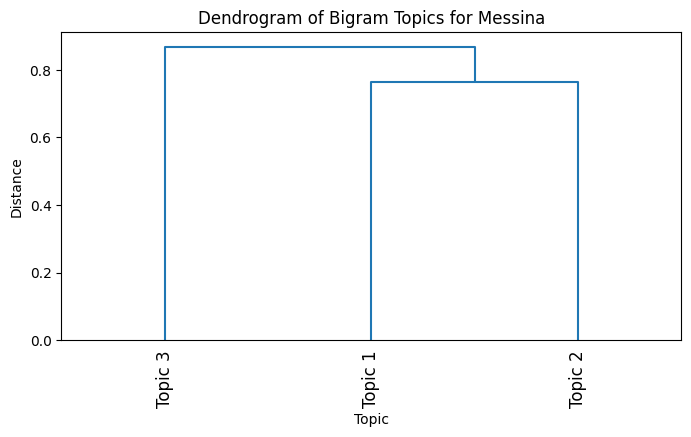

In [34]:
from scipy.spatial.distance import jensenshannon
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming you have the LDA model fitted with bigrams `lda_ngrams`
# and the feature names from the bigrams vectorizer `feature_names_ngrams`

# 1. Compute Topic Distribution
topic_word_distributions = lda_ngrams.components_ / lda_ngrams.components_.sum(axis=1)[:, np.newaxis]

# 2. Calculate Distance Matrix
dist_matrix = np.zeros((num_topics, num_topics))
for i in range(num_topics):
    for j in range(num_topics):
        dist_matrix[i, j] = jensenshannon(topic_word_distributions[i], topic_word_distributions[j])

# 3. Perform Hierarchical Clustering
Z = linkage(dist_matrix, 'average')  # 'average' linkage can be used or 'ward'

# 4. Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(
    Z,
    labels=[f'Topic {i+1}' for i in range(num_topics)],
    leaf_rotation=90,
)
plt.title('Dendrogram of Bigram Topics for Messina')
plt.xlabel('Topic')
plt.ylabel('Distance')
plt.show()

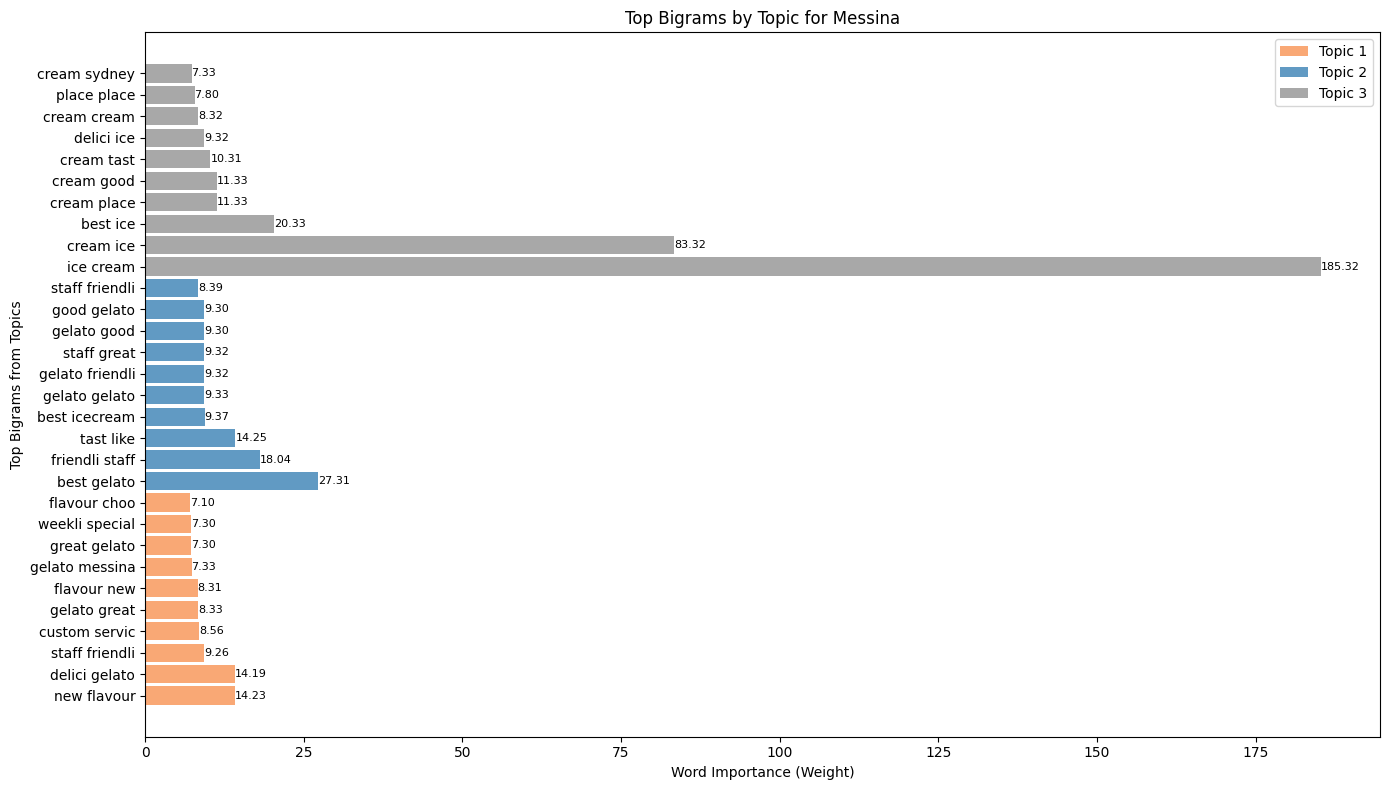

In [35]:
# Extract feature names (bigrams) from the vectorizer
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()

no_top_words = 10
# Create a DataFrame to hold the scored words for each topic
df_topics_ngrams = pd.DataFrame()

# Extract the top words and their scores for each topic
for topic_idx, topic_components in enumerate(lda_ngrams.components_):
    # Sort the indices of the topic components in descending order of weights
    top_indices = topic_components.argsort()[::-1][:no_top_words]

    # Get the top words and their corresponding weights
    top_features = [feature_names_ngrams[i] for i in top_indices]
    top_weights = topic_components[top_indices]

    # Add the top words and weights to the DataFrame
    df_topics_ngrams[f'Topic {topic_idx} Words'] = top_features
    df_topics_ngrams[f'Topic {topic_idx} Weights'] = top_weights

# Transpose the DataFrame to have topics as columns
df_topics_ngrams = df_topics_ngrams.T

fig, ax = plt.subplots(figsize=(14, 8))

# Width of the bars
bar_width = 0.85

# Colors for different topics, assuming three topics
colors = ['#f9a875', '#619ac3', '#a8a8a8']  # Orange, Blue, Grey

# Store the words and their positions for labeling on the y-axis
tick_labels = []
positions = []

# Starting position for the first topic's bars
current_position = 0

# Iterate over the topics to plot the bars
for topic_idx in range(lda_ngrams.n_components):
    # Get the top words and weights for the topic
    top_features = df_topics_ngrams.loc[f'Topic {topic_idx} Words'].values
    top_weights = df_topics_ngrams.loc[f'Topic {topic_idx} Weights'].values

    # Plotting the bars for the current topic's bigrams
    bars = ax.barh(current_position + np.arange(no_top_words), top_weights, height=bar_width, label=f'Topic {topic_idx + 1}', color=colors[topic_idx % len(colors)])

    # Annotating the bars with the score
    for bar, weight in zip(bars, top_weights):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{weight:.2f}', va='center', ha='left', fontsize=8)

    # Add the words to the tick_labels list for the y-axis
    tick_labels.extend(top_features)

    # Update the positions for y-ticks
    positions.extend(current_position + np.arange(no_top_words))

    # Update the starting position for the next topic
    current_position += no_top_words

# Set the y-ticks to be in the middle of the bars for each topic
ax.set_yticks(positions)
ax.set_yticklabels(tick_labels)

# Set the labels and title of the plot
ax.set_xlabel('Word Importance (Weight)')
ax.set_ylabel('Top Bigrams from Topics')
ax.set_title('Top Bigrams by Topic for Messina')

# Add a legend to identify the topics
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

## WordCloud

In [ ]:
from wordcloud import WordCloud

all_comments = ' '.join(df2['comments_cleansed'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

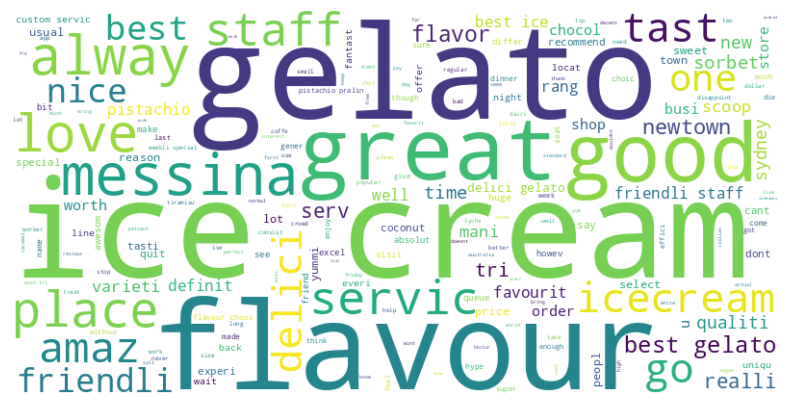

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()